# Generate geometries used as an input for manually-created diagram

In [28]:
import geopandas as gpd
import momepy as mm
import matplotlib.pyplot as plt
from libpysal.graph import Graph

Load existing data

In [ ]:
p = mm.datasets.get_path('bubenec')
blg = gpd.read_file(p, layer='buildings')
streets = gpd.read_file(p, layer='streets')

Generate additional

In [ ]:
nodes = mm.nx_to_gdf(mm.gdf_to_nx(streets), lines=False)
encl = mm.enclosures(streets, limit=mm.buffered_limit(blg, buffer='adaptive'))
et = mm.enclosed_tessellation(blg, encl)

Get graph

In [31]:
g = Graph.build_fuzzy_contiguity(et, buffer=.1).subgraph(blg.index)

Plot and save.

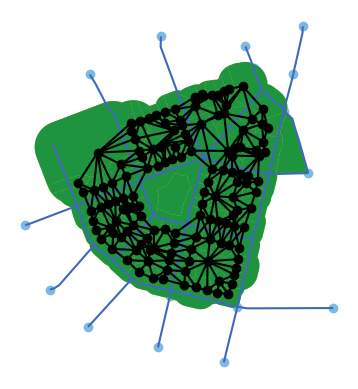

In [33]:
ax = blg.plot(color="#E0665F")
streets.plot(color="#4069BC", ax=ax)
nodes.plot(ax=ax, color="#7CBAE4")
encl.plot(ax=ax, color="#b2cd32")
et.plot(ax=ax, color='#1F943E')
g.plot(blg.representative_point(), ax=ax)
ax.set_axis_off()
plt.savefig('../data/fig_data.svg')